In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm,Normalize

In [439]:
! pwd

/Volumes/HDD Data 750GB/Programs/Fisher/github


In [440]:
# This function extracts the outlier points (the red points) from the z catalogue. 
def outlier_points(zp,zs):
        tmp_x      = np.where( (zp > float(0.300)) & (zp < float(3.0)) )[0]
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot ) / ( 1.0 + tmp_z_phot )
        q75, q25   = np.percentile( tmp_dz, [75 ,25]) # COR IQR
        sigma      = ( q75 - q25 ) / float(1.349)
        threesigma = float(3.0) * sigma
        ox = np.where( ( np.fabs( tmp_dz ) > float(0.0600) ) & ( np.fabs( tmp_dz ) > threesigma ) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt

## Extracting the photz and spectr_z from the catalogue, for tzpz plot

In [509]:
aa = pd.read_csv('CMNN_Photoz_Estimator-master/output/run_big_sample/zphot.cat',sep=r"\s+")# photoz catalogue

In [510]:
f = pd.read_csv('interpolated_fout_new3.csv',sep=' ' ) # output file from program, we will compare with this

In [511]:
# Extracting the z_photo and z_spectra column form the zphoto catalogue
index=range(0,len(aa.iloc[:, 1]))
index

columns=['z_true','z_phot']
bb = pd.DataFrame(index=index, columns=columns)

bb['z_true']=aa.iloc[:, 1]
bb['z_phot']=aa.iloc[:, 2]

bb = bb.sort_values('z_true')   
bb.to_csv('tzpz_plotting/tzpz_plotting_data_gray.csv',index=False,sep=' ')

In [512]:
#bb = bb.drop(bb[bb.z_true > 1.201].index)

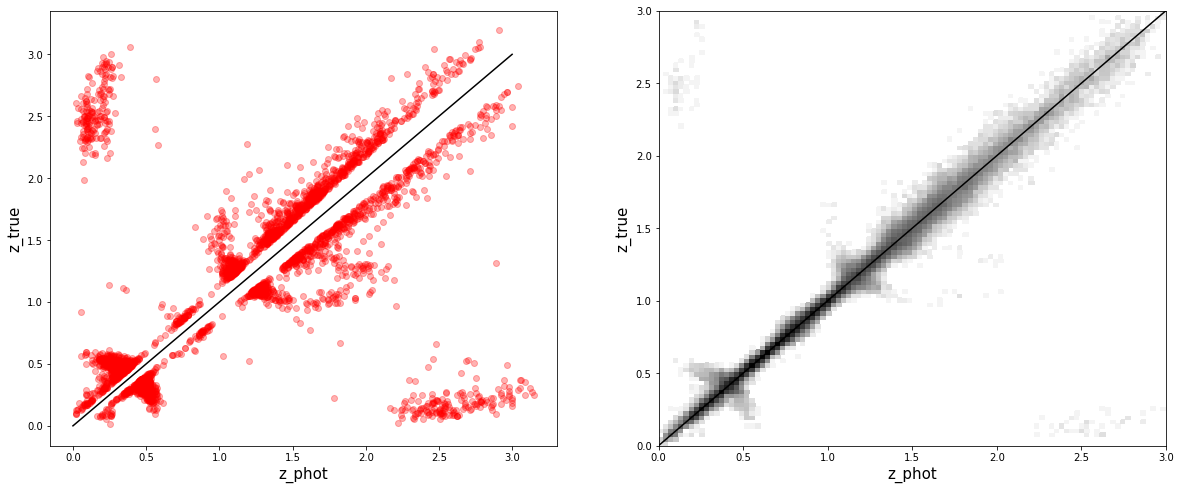

In [539]:
plt.rcParams['figure.figsize'] = [20,8] 
plt.subplot(1,2,1)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
 #           cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.3,c='r')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

plt.subplot(1,2,2)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

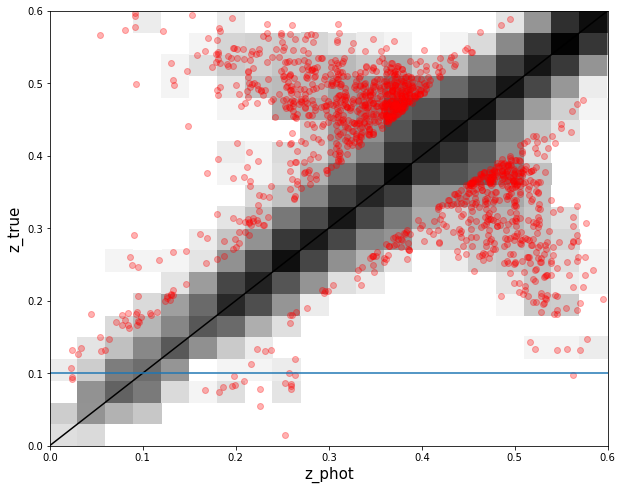

In [531]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.3,c='r')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
plt.xlim(0.,0.6)
plt.ylim(0.0,0.6)
plt.axhline(0.1)

### Binning the data to compute the mean redshifts per bin and the no. of candidates
#### This is for the grey points

In [515]:
# Binning the data to compute the mean redshifts per bin and the no. of candidates
bins = np.linspace(0,3.3,34)
label = np.linspace(0.05,3.25,33)
bb['bin_z'] = pd.cut(bb.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_main = bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).mean()
tzpz_main.columns = ['z_true_mean','z_phot_mean']
tzpz_main.reset_index(drop=True, inplace=True)
tzpz_main =  pd.concat([tzpz_main,N],axis=1,ignore_index=True)
tzpz_main =  pd.concat([tzpz_main,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_main.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_main = tzpz_main[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_main = tzpz_main.iloc[0:12 , : ]
#tzpz_main = tzpz_main.sort_values('z_true_mean')  

In [516]:
tzpz_main

,Bin,N,z_true_mean,z_phot_mean
0,0.05,536,0.076951,0.201648
1,0.15,1502,0.162803,0.303980
2,0.25,5108,0.252827,0.281775
3,0.35,6100,0.353485,0.367541
4,0.45,7046,0.450709,0.436828
5,0.55,6676,0.551791,0.543817
6,0.65,6909,0.647817,0.647375
7,0.75,7782,0.750480,0.753455
8,0.85,6535,0.848409,0.845089
9,0.95,6103,0.947165,0.946239


#### This is for the outlier points (red dots)

In [517]:
tzpz_out = outlier_points(bb['z_phot'],bb['z_true'])
tzpz_out = tzpz_out.sort_values('zspec')  
#tzpz_out.to_csv('tzpz_plotting/tzpz_plotting_data_red.csv',sep=' ',index=False)

In [518]:
bins = np.linspace(0,3.3,34)
label = np.linspace(0.05,3.25,33)
tzpz_out['bin_z'] = pd.cut(tzpz_out.zspec, bins=bins)#, labels=label)

N = pd.DataFrame(tzpz_out.groupby(pd.cut(tzpz_out.zspec, bins=bins,labels=label)).count()).zspec
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_outt = tzpz_out.groupby(pd.cut(tzpz_out.zspec, bins=bins,labels=label)).mean()
tzpz_outt.columns = ['z_true_mean','z_phot_mean']
tzpz_outt.reset_index(drop=True, inplace=True)
tzpz_outt =  pd.concat([tzpz_outt,N],axis=1,ignore_index=True)
tzpz_outt =  pd.concat([tzpz_outt,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_outt.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_outt = tzpz_outt[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_outt = tzpz_outt.iloc[0:12 , :]
#tzpz_outt = tzpz_outt.sort_values('z_true_mean')  

In [519]:
tzpz_outt['f_out'] = tzpz_outt.N/(tzpz_main.N)

In [520]:
tzpz_outt

,Bin,N,z_true_mean,z_phot_mean,f_out
0,0.05,43,1.530618,0.079184,0.080224
1,0.15,134,1.611607,0.153832,0.089214
2,0.25,247,0.829127,0.256058,0.048356
3,0.35,353,0.529417,0.352436,0.057869
4,0.45,497,0.354921,0.465685,0.070536
5,0.55,241,0.357265,0.530671,0.036099
6,0.65,13,0.908625,0.652025,0.001882
7,0.75,35,0.869637,0.754731,0.004498
8,0.85,55,0.787105,0.855449,0.008416
9,0.95,43,1.208204,0.962008,0.007046


In [521]:
test = pd.concat([tzpz_main,tzpz_outt.iloc[: , 1:]],axis=1)
test.columns = ['Bin','N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R','fout']

In [522]:
test['COR_Outlier_Bias'] = (test.z_true_mean_R - test.z_phot_mean_R)/(1+test.z_phot_mean_R)

### We combine the two files. We identify the gray points with 'G' and red (outlier points) with 'R'. 
#### N = No. of Points in that bin

In [523]:
test

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.05,536,0.076951,0.201648,43,1.530618,0.079184,0.080224,1.344937
1,0.15,1502,0.162803,0.303980,134,1.611607,0.153832,0.089214,1.263421
2,0.25,5108,0.252827,0.281775,247,0.829127,0.256058,0.048356,0.456244
3,0.35,6100,0.353485,0.367541,353,0.529417,0.352436,0.057869,0.130860
4,0.45,7046,0.450709,0.436828,497,0.354921,0.465685,0.070536,-0.075571
5,0.55,6676,0.551791,0.543817,241,0.357265,0.530671,0.036099,-0.113288
6,0.65,6909,0.647817,0.647375,13,0.908625,0.652025,0.001882,0.155324
7,0.75,7782,0.750480,0.753455,35,0.869637,0.754731,0.004498,0.065483
8,0.85,6535,0.848409,0.845089,55,0.787105,0.855449,0.008416,-0.036834
9,0.95,6103,0.947165,0.946239,43,1.208204,0.962008,0.007046,0.125482


In [524]:
#test.to_csv('tzpz_bin_data.csv',sep=' ',index=False)

### Comparing to the data file from the program

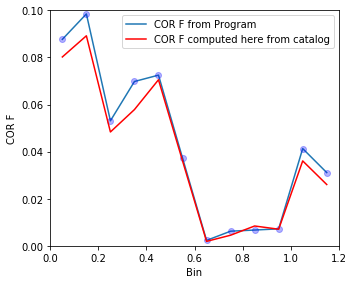

In [525]:
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,f.F,label='COR F from Program')
plt.plot(f.z_true,f.F,'o',alpha=0.3,c='b',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('COR F')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.N/(tzpz_main.N),c='r',label = 'COR F computed here from catalog')
plt.xlim(0,1.2)
plt.ylim(0,0.1)
plt.legend()

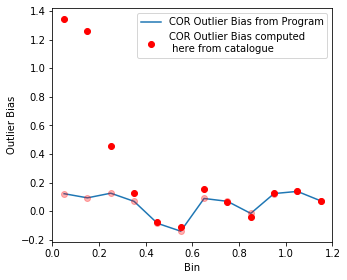

In [526]:
outlier_bias = (tzpz_outt.z_true_mean - tzpz_outt.z_phot_mean)/(1+tzpz_outt.z_phot_mean)
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,(f.outlier_bias),label='COR Outlier Bias from Program')
plt.plot(f.z_true,(f.outlier_bias),'o',alpha=0.3,c='r',label='_nolegend_')
#plt.plot(f.z_true,(f.z_true-f.z_photo)/(1+f.z_photo),'o',alpha=0.3,c='r',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('Outlier Bias')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,test.COR_Outlier_Bias,'o',c='r',label='COR Outlier Bias computed \n here from catalogue')
plt.xlim(0,1.2)
#plt.ylim(0,1.2)
plt.legend()

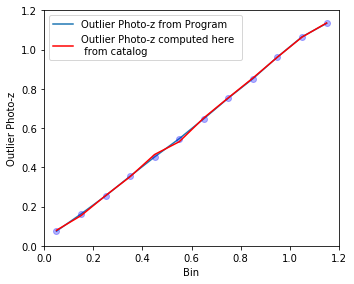

In [527]:
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,f.z_photo,label='Outlier Photo-z from Program')
plt.plot(f.z_true,f.z_photo,'o',alpha=0.3,c='b',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('Outlier Photo-z')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.z_phot_mean,c='r',label='Outlier Photo-z computed here \n from catalog')
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.legend()

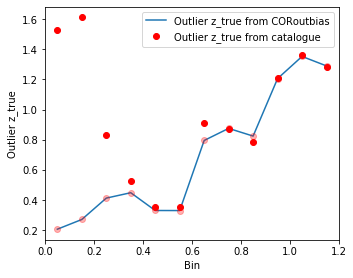

In [528]:
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,(f.outlier_bias*(1+f.z_photo))+f.z_photo,label='Outlier z_true from CORoutbias')
plt.plot(f.z_true,(f.outlier_bias*(1+f.z_photo))+f.z_photo,'o',alpha=0.3,c='r',label='_nolegend_')
#plt.plot(f.z_true,(f.z_true-f.z_photo)/(1+f.z_photo),'o',alpha=0.3,c='r',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('Outlier z_true')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.z_true_mean,'o',c='r',label='Outlier z_true from catalogue')
plt.xlim(0,1.2)
#plt.ylim(0,1.2)
plt.legend()

# ------------ Not Needed --------------
# From the file produced in code

In [529]:
main = pd.read_csv('CMNN_Photoz_Estimator-master/output/run_1/analysis/tzpz_main.csv',sep=' ')
out = pd.read_csv('CMNN_Photoz_Estimator-master/output/run_1/analysis/tzpz_out.csv',sep=' ')

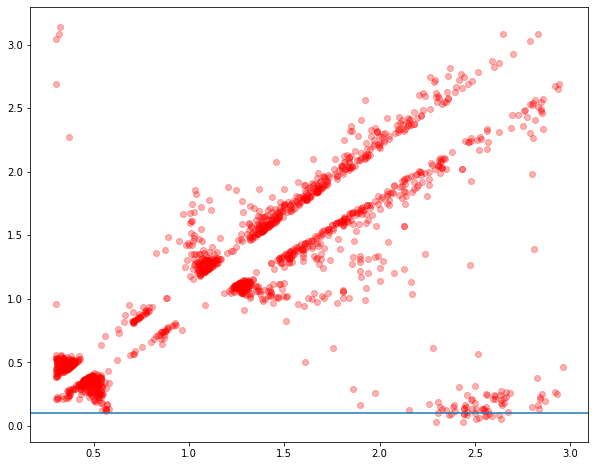

In [533]:
#plt.plot(main['zphot'],main['zspec'],'o',c='gray')
plt.plot(out['zphot'],out['zspec'],'o',c='red',alpha=0.3)
plt.axhline(0.1)